In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline

## 1000 Dataset

In [2]:
#Preparation of data for datset of only 1000 GeV mass particle
    #Training data was messed up so I had to fix it by splitting it up into different files
df_train_1 = pd.read_csv("1000_train_1.csv")
df_train_2 = pd.read_csv("1000_train_2.csv")
df_train_3 = pd.read_csv("1000_train_3.csv")
df_train_4 = pd.read_csv("1000_train_4.csv")
df_train_5 = pd.read_csv("1000_train_5.csv")
df_train_6 = pd.read_csv("1000_train_6.csv")
df_train_7 = pd.read_csv("1000_train_7.csv")
df_train_8 = pd.read_csv("1000_train_8.csv")
df_test = pd.read_csv("1000_test.csv")

#Combining of 8 training data segments into one dataframe
df_train_list = [df_train_2, df_train_3, df_train_4, df_train_5, df_train_6, df_train_7, df_train_8]
df_train = df_train_1.append(df_train_list, ignore_index=True)

#Adds mass column to match the other datasets
df_train.insert(len(df_train.columns), 'mass', 1000, allow_duplicates=True)
df_test.insert(len(df_test.columns), 'mass', 1000, allow_duplicates=True)

In [3]:
#Data check
#df_train.head()

In [4]:
#Data check
#df_test.head()

## Not-1000 Dataset (500, 750, 1250, 1500)

In [5]:
#Reading in dataset for events of all masses except 1000 mass particle (500, 750, 1250, 1500)
df_train_not = pd.read_csv("not1000_train.csv")
df_test_not = pd.read_csv("not1000_test.csv")

In [6]:
#Rounds mass values to whole numbers (some are floats)
df_train_not['mass'] = df_train_not['mass'].apply(lambda x: round(x))
df_test_not['mass'] = df_test_not['mass'].apply(lambda x: round(x))

In [7]:
#Data check
#df_train_not.head()

In [8]:
#Data check
#df_test_not.head()

## All Dataset (500, 750, 1000, 1250, 1500)

In [9]:
#Reading in dataset for events of all masses (500, 750, 1000, 1250, 1500)
df_train_all = pd.read_csv("all_train.csv")
df_test_all = pd.read_csv("all_test.csv")

In [10]:
#Rounds mass values to whole numbers (some are floats)
df_train_all['mass'] = df_train_all['mass'].apply(lambda x: round(x))
df_test_all['mass'] = df_test_all['mass'].apply(lambda x: round(x))

In [11]:
#Data check
#df_train_all.head()

In [12]:
#Data check 
#df_test_all.head()

### DataFrame Splitting

In [13]:
#Splitting data into input/output variables and mass parameters for classification

#1000-mass dataset
#train
train_labels = df_train['# label']
df_train_param = df_train['mass']
df_train_feat = df_train.drop(columns=['# label', 'mass'])
#test
test_labels = df_test['# label']
df_test_param = df_test['mass']
df_test_feat = df_test.drop(columns=['# label', 'mass'])

# Not-1000 dataset
#train
trainNot_labels = df_train_not['# label']
df_trainNot_param = df_train_not['mass']
df_trainNot_feat = df_train_not.drop(columns=['# label', 'mass'])
#test
testNot_labels = df_test_not['# label']
df_testNot_param = df_test_not['mass']
df_testNot_feat = df_test_not.drop(columns=['# label', 'mass'])

#All mass dataset
#train
trainAll_labels = df_train_all['# label']
df_trainAll_param = df_train_all['mass']
df_trainAll_feat = df_train_all.drop(columns=['# label', 'mass'])
#test
testAll_labels = df_test_all['# label']
df_testAll_param = df_test_all['mass']
df_testAll_feat = df_test_all.drop(columns=['# label', 'mass'])

### Scaling/Encoding data

In [15]:
#Features are centered then scaled
train_feat = StandardScaler().fit_transform(df_train_feat)
test_feat = StandardScaler().fit_transform(df_test_feat)

trainNot_feat = StandardScaler().fit_transform(df_trainNot_feat)
testNot_feat = StandardScaler().fit_transform(df_testNot_feat)

trainAll_feat = StandardScaler().fit_transform(df_trainAll_feat)
testAll_feat = StandardScaler().fit_transform(df_testAll_feat)

In [16]:
#mass parameters are encoded to be int between 0-4
le = LabelEncoder()
le.fit(df_trainAll_param)

#1000-mass data
train_param = le.transform(df_train_param)
test_param = le.transform(df_test_param)

#Not-1000 data
trainNot_param = le.transform(df_trainNot_param)
testNot_param = le.transform(df_testNot_param)

#All mass dataset
trainAll_param = le.transform(df_trainAll_param)
testAll_param = le.transform(df_testAll_param)

### Recombining features and parameters

In [17]:
#1000-mass dataset
train_param = np.reshape(train_param, (-1,1))
train = np.concatenate([train_feat,train_param], axis=1)

test_param = np.reshape(test_param, (-1,1))
test = np.concatenate([test_feat,test_param], axis=1)

#Not-1000 dataset
trainNot_param = np.reshape(trainNot_param, (-1,1))
trainNot = np.concatenate([trainNot_feat,trainNot_param], axis=1)

testNot_param = np.reshape(testNot_param, (-1,1))
testNot = np.concatenate([testNot_feat,testNot_param], axis=1)

#All mass dataset
trainAll_param = np.reshape(trainAll_param, (-1,1))
trainAll = np.concatenate([trainAll_feat,trainAll_param], axis=1)

testAll_param = np.reshape(testAll_param, (-1,1))
testAll = np.concatenate([testAll_feat,testAll_param], axis=1)

### Neural Network

In [18]:
#print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

In [19]:
inputs = tf.keras.Input(shape=(28,), name='features')
hidden_1 = tf.keras.layers.Dense(20, activation='relu')(inputs)
#hidden_2 = tf.keras.layers.Dense(20, activation='relu')(hidden_1)
concat = tf.keras.layers.Concatenate()([inputs, hidden_1])
output = tf.keras.layers.Dense(1, activation='sigmoid', name='output')(hidden_1)

model = tf.keras.Model(inputs=inputs, outputs=output)

In [20]:
model.compile(optimizer=tf.keras.optimizers.SGD(momentum=0.9, nesterov=True),
                  loss='binary_crossentropy', 
                  metrics=[['accuracy'], ['Precision'], ['Recall']])

history = model.fit(trainNot, 
                    trainNot_labels, 
                    validation_split=0.2, 
                    batch_size=8, 
                    epochs=3, 
                    use_multiprocessing=True, 
                    workers=4, 
                    verbose=True)

Epoch 1/3
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
699988/700000 [============================>.] - ETA: 0s - loss: 0.3202 - accuracy: 0.8475 - precision: 0.8323 - recall: 0.8705WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000002A5F58D0558> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 

In [21]:
loss, acc, pre, rec = model.evaluate(test, 
                                     test_labels, 
                                     batch_size=8,
                                     workers=4,
                                     use_multiprocessing=True) 
pred = model.predict(test,
                     batch_size=8,
                     workers=4,
                     use_multiprocessing=True)

437500/437500 [==============================] - 689s 2ms/step - loss: 0.2205 - accuracy: 0.9144 - precision: 0.9000 - recall: 0.9324
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [22]:
loss_not, acc_not, pre_not, rec_not = model.evaluate(testNot, 
                                                     testNot_labels,
                                                     batch_size=8, 
                                                     workers=4, 
                                                     use_multiprocessing=True)
not_pred = model.predict(testNot,
                         batch_size=8,
                         workers=4,
                         use_multiprocessing=True)

437500/437500 [==============================] - 689s 2ms/step - loss: 0.3150 - accuracy: 0.8504 - precision: 0.8323 - recall: 0.8775


In [23]:
# loss_all, acc_all, pre_all, rec_all = model.evaluate(testAll, 
#                                                      testAll_labels,
#                                                      batch_size=8, 
#                                                      workers=4, 
#                                                      use_multiprocessing=True) 
# all_pred = model.predict(testAll,
#                          batch_size=8,
#                          workers=4,
#                          use_multiprocessing=True)

437500/437500 [==============================] - 688s 2ms/step - loss: 0.2967 - accuracy: 0.8627 - precision: 0.8459 - recall: 0.8867


In [24]:
print(f'\nModel trained on not1000-data:')
print(f'\nAccuracy on 1000-test data: {acc*100:.1f}%')
print(f'Precision on 1000-test data: {pre*100:.1f}%')
print(f'Recall on 1000-test data: {rec*100:.1f}%')
 
print(f'\nAccuracy on not1000-test data: {acc_not*100:.1f}%')
print(f'Precision on not1000-test data: {pre_not*100:.1f}%')
print(f'Recall on not1000-test data: {rec_not*100:.1f}%')

# print(f'\nAccuracy on all1000-test data: {acc_all*100:.1f}%')
# print(f'Precision on all1000-test data: {pre_all*100:.1f}%')
# print(f'Recall on all1000-test data: {rec_all*100:.1f}%')


Model trained on not1000-data:

Accuracy on 1000-test data: 91.4%
Precision on 1000-test data: 90.0%
Recall on 1000-test data: 93.2%

Accuracy on not1000-test data: 85.0%
Precision on not1000-test data: 83.2%
Recall on not1000-test data: 87.8%

Accuracy on all1000-test data: 86.3%
Precision on all1000-test data: 84.6%
Recall on all1000-test data: 88.7%


In [25]:
#Rounds class predictions to either 0 or 1
test_pred = np.where(pred > 0.5, 1., 0.)

#Copies dataframe to more useful name
df_test_pred = df_test_feat

#adds predicted labels to dataframe
df_test_pred.insert(0, '# label', test_pred)

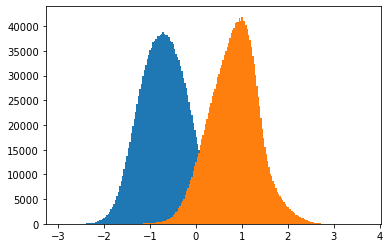

In [26]:
pred_bkg = df_test_pred[df_test_pred['# label'] == 0.]
pred_sig = df_test_pred[df_test_pred['# label'] == 1.]

#predicted background histogram
n_bkg, bins_bkg, p_bkg = plt.hist(pred_bkg['f6'], bins=200);

#predicted signal histogram
n_sig, bins_sig, p_sig = plt.hist(pred_sig['f6'], bins=200);

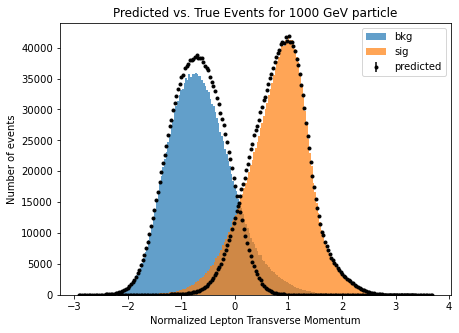

In [28]:
plt.figure(figsize=(7,5))

#Background
n, bins, patches = plt.hist(df_test['f6'][df_test['# label'] == 0], bins=200, 
                            alpha=0.7, label='bkg')
#gets bin center for background events
bkg_cntr = 0.5*(bins_bkg[1:]+bins_bkg[:-1])
#plots predicted background labels
plt.errorbar(bkg_cntr, n_bkg, yerr=0, fmt='.k')

#Signal
n, bins, patches = plt.hist(df_test['f6'][df_test['# label'] == 1], bins=200, 
                            alpha=0.7, label='sig')
#gets bin center for signal events
sig_cntr = 0.5*(bins_sig[1:]+bins_sig[:-1])
#plots predicted signal labels
plt.errorbar(sig_cntr, n_sig, yerr=0, fmt='.k', label='predicted')


plt.xlabel('Normalized Lepton Transverse Momentum')
plt.ylabel('Number of events')
plt.title('Predicted vs. True Events for 1000 GeV particle')
plt.legend()
#plt.savefig('predSigHist.png')
plt.show()